In [1]:
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NOTE_NAMES = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

MAJOR_SCALE_DEGREES = [0, 2, 4, 5, 7, 9, 11]
MINOR_SCALE_DEGREES = [0, 2, 3, 5, 7, 8, 10]

TONIC_WEIGHT = 1.0
DOMINANT_WEIGHT = 0.9
SUBDOMINANT_WEIGHT = 0.7
NON_DIATONIC_WEIGHT = 0.3

LOAD_TRACK = {
    'Stronger': os.path.abspath(os.path.join("..", "data", "audio", "Stronger.mp3")),
}

TRACK_DETAILS = {
    'Stronger': {
        'title': 'Stronger',
        'artist': 'Kanye West',
        'album': 'Graduation',
        'release_year': 2007,
        'key': '',
        'bpm': '',
        'time_signature': '',
    },
}

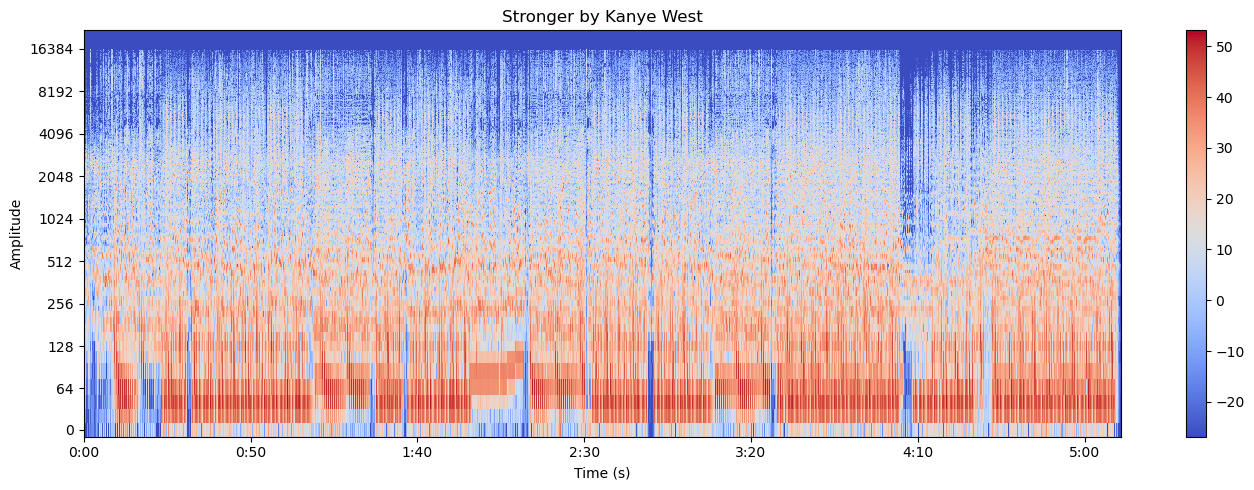

In [20]:
samples, sample_rate = librosa.load(LOAD_TRACK['Stronger'], sr=None, mono=True)

# only trims the audio doesn't change sample rate or mono/stereo
samples_trimmed, trimmed_range = librosa.effects.trim(samples)


# Short-Time Fourier Transform (STFT)
stft = librosa.stft(samples_trimmed)

spectrogram = librosa.amplitude_to_db(np.abs(stft))


plt.figure(figsize=(14, 5))
#librosa.display.waveshow(samples_trimmed, sr=sample_rate)
librosa.display.specshow(spectrogram, sr=sample_rate, x_axis='time', y_axis='log')

plt.colorbar()

plt.title("Stronger by Kanye West")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()